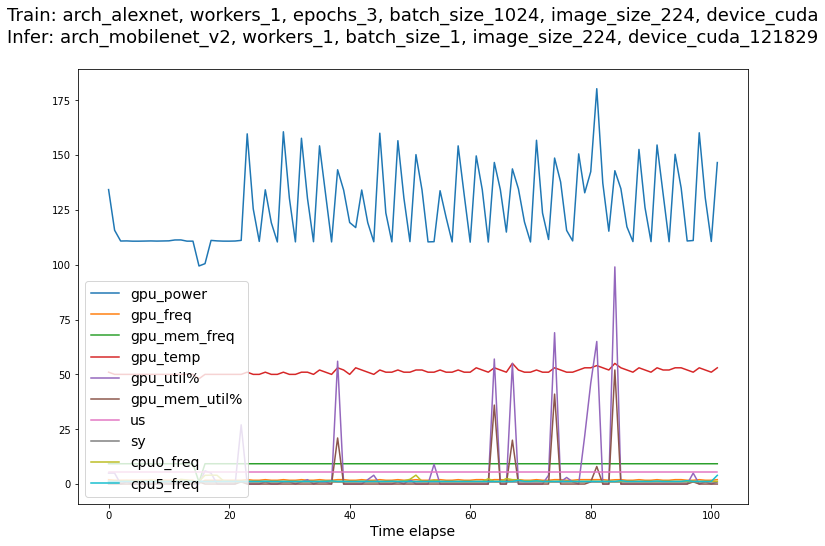

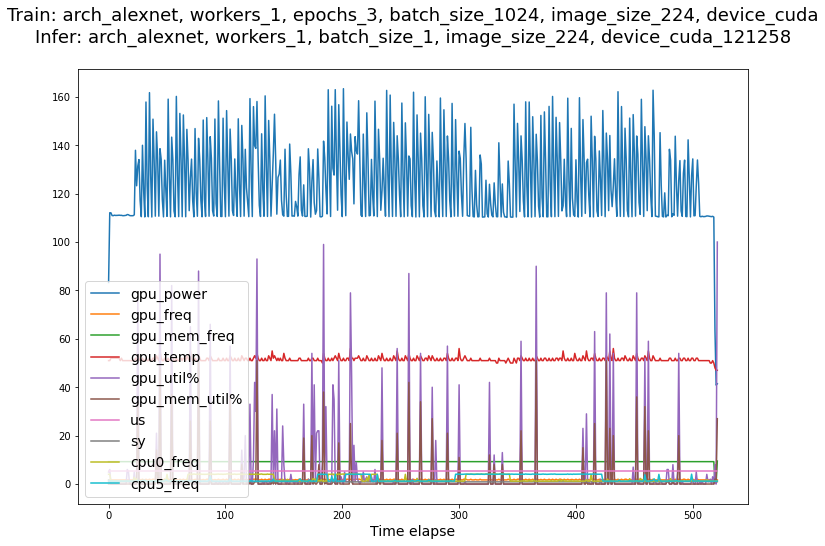

In [48]:
# Plotting
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import os

folder = '2022-12-22'
folder = os.path.join('../result/log',folder)

def filename2config(file_name):
    '''
    'Train arch_vgg16 workers_1 epochs_3 batch_size_32 image_size_224 device_cuda + Infer arch_resnet50 workers_1 epochs_3 batch_size_1 image_size_224 device_cuda'
    to
    'Train: arch_vgg16, workers_1, epochs_3, batch_size_32, image_size_224, device_cuda \r
    'Infer, arch_resnet50, workers_1, epochs_3, batch_size_1, image_size_224, device_cuda'
    '''
    tasks = file_name.split('+')  # saperate to two string of "Train" and "Infer"
    task_names = ''

    for i, task in enumerate(tasks):

        config_list = []  # task: string of train/infer, config[i]: list of batch_size, arch , etc
        config_list = task.strip().split(' ')
        config_str = config_list[0] + ': '  # add 'Train:', or 'infer'
        for i in range(1, len(config_list)):  # skip first element string of "Train"
            config_str += config_list[i] + ', '
        config_str = config_str[:-2]
        task_names = task_names+ config_str+'\n'
    return task_names
        
for file_name in os.listdir(folder):
    data = pd.read_csv(os.path.join(folder,file_name))
    file_name =  re.findall(r'(Train.+).csv',file_name)[0]  # extract filename start from "Train"
    task_names = filename2config(file_name)
        
   
    col_sel = ['gpu_power','gpu_freq','gpu_mem_freq','gpu_temp','gpu_util%','gpu_mem_util%', 'us','sy','cpu0_freq','cpu5_freq']
    data_sel = data[col_sel]

    plot=plt.figure(figsize=(12, 8))
    y= data_sel.index
    for item in col_sel:
        x= (data_sel[item]).tolist()
        if re.findall(r'(gp.+?)\_freq', item):  # gpu frequency
            for i in range(len(x)):x[i] = float(x[i])/1e3
        elif re.findall(r'(cp.+?)\_freq',item):  #if is cpu frequency
            for i in range(len(x)): x[i] = float(x[i])/1e6
        else:
            for i in range(len(x)): x[i] = float(x[i])
        plt.plot(y,x, label = item)
    plt.legend(loc=3, fontsize = 14)
    plt.title(task_names, fontsize= 18)
    plt.xlabel('Time elapse', fontsize= 14)
    plt.show()

    plot.savefig('../result/plot/'+file_name+'.jpg')



# backup

In [26]:
folder = '2022-12-08'
folder = os.path.join('../result/log',folder)
for file_name in os.listdir(folder):
    model_name =  re.findall(r'(.+).csv',file_name)
    print (model_name)

['004328_archvgg16_workers1_epochs3_batch_size16']


In [3]:
import os
import json
import pandas as pd

folder = '2022-12-08'
folder = os.path.join('../result/log',folder)
file_name = '105057_archvgg16_workers1_epochs3_batch_size16_image_size224.json'
data = pd.read_json(os.path.join(folder,file_name))
data

,time_stamp,gpu_power,gpu_freq,gpu_mem_freq,gpu_temp,gpu_util%,gpu_mem_util%,gpu_name,timestamp,us,...,wa,hi,si,st,cpu0_freq,cpu1_freq,cpu2_freq,cpu3_freq,cpu4_freq,cpu5_freq
0,1.670515e+09,8.00,265,405,50,1,3,NVIDIA GeForce GTX 1060 6GB,2022-12-08 15:50:39.133843200,14.6,...,1,0,0,0,3333249,3333249,3333347,3333239,3333383,3333226
1,1.670515e+09,13.04,265,405,50,0,3,NVIDIA GeForce GTX 1060 6GB,2022-12-08 15:50:39.898204160,20.6,...,1,0,0,0,3333247,3333245,3333282,3333277,3333315,3333226
2,1.670515e+09,9.65,265,405,50,0,3,NVIDIA GeForce GTX 1060 6GB,2022-12-08 15:50:40.681239296,18.4,...,0,0,0,0,3402614,3382265,3424323,3394703,3460744,3449651
3,1.670515e+09,8.19,265,405,50,0,3,NVIDIA GeForce GTX 1060 6GB,2022-12-08 15:50:41.453420032,18.4,...,0,0,0,0,3510612,3558960,3463147,3512543,3536994,3587372
4,1.670515e+09,8.29,265,405,50,0,3,NVIDIA GeForce GTX 1060 6GB,2022-12-08 15:50:42.230558976,16.7,...,0,0,0,0,3521713,3553174,3525860,3520857,3545327,3587526
5,1.670515e+09,31.40,1556,3802,51,7,1,NVIDIA GeForce GTX 1060 6GB,2022-12-08 15:50:43.002341632,14.3,...,0,0,0,0,3338408,3304996,3419799,3329057,3305468,3376074
6,1.670515e+09,31.41,1556,3802,51,6,1,NVIDIA GeForce GTX 1060 6GB,2022-12-08 15:50:43.777405696,12.2,...,0,0,0,0,3321639,3333324,3333227,3324594,3332472,3332154
7,1.670515e+09,31.41,1556,3802,51,7,1,NVIDIA GeForce GTX 1060 6GB,2022-12-08 15:50:44.554600960,18.4,...,0,0,0,0,3333311,3333337,3333231,3321638,3333360,3332633
8,1.670515e+09,33.44,1721,3802,51,0,0,NVIDIA GeForce GTX 1060 6GB,2022-12-08 15:50:45.315313664,17.3,...,0,0,0,0,3333228,3333330,3333279,3333302,3333281,3333227
9,1.670515e+09,33.54,1721,3802,51,0,0,NVIDIA GeForce GTX 1060 6GB,2022-12-08 15:50:46.069488384,18.6,...,0,0,0,0,3398792,3341158,3375901,3387952,3435764,3405656
